In [22]:
import pandas as pd

df_raw=pd.read_csv('raw_amazon_echo_reviews.csv')
df_raw.head()

,Uniq Id,Crawl Timestamp,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Review Useful Count,Configuration Text,Ratting,Declaration Text
0,d63583450415a20094950528ffb4d955,2017-10-26 15:57:14 +0000,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Love the Echo Dot.,Black,Verified Purchase,2017-07-03,NaN,Echo Dot,5.0 out of 5 stars,NaN
1,dc8e5ca6b44bea1006c8bb85cdca3816,2017-10-26 15:57:14 +0000,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Working just fine.,Black,Verified Purchase,2017-07-12,NaN,Echo Dot,5.0 out of 5 stars,NaN
2,f3f823996e2317dd65a6235011492b42,2017-10-26 15:57:14 +0000,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,I love my Echo Dot,Black,Verified Purchase,2017-08-01,NaN,Echo Dot,5.0 out of 5 stars,NaN
3,3b6c928e62707a1530c591b897b864d6,2017-10-26 15:57:14 +0000,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Three Stars,Not great speakers,Black,Verified Purchase,2017-10-03,NaN,Echo Dot,3.0 out of 5 stars,NaN
4,275af85c81c1be55efd706f51a6c7cbe,2017-10-26 15:57:14 +0000,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Great assistant !!,Black,Verified Purchase,2017-07-22,NaN,Echo Dot,5.0 out of 5 stars,NaN


In [23]:
# Check for any empty or missing values in the 'Title' column
empty_title = df_raw['Title'].isnull().sum()
empty_title_exists = empty_title > 0
empty_title_exists, empty_title

(False, 0)

In [24]:
# Check for any empty or missing values in the 'Review Text' column
empty_title = df_raw['Review Text'].isnull().sum()
empty_title_exists = empty_title > 0
empty_title_exists, empty_title

(True, 13)

In [25]:
#Join 'Title' and 'Review Text' columns. Separate each one with a full stop as often a lot of information was in the title.
#Using a full stop is the best punctation type to separete the title and review (often the title is just a continuation from the review)

df_raw['Complete_Review'] = df_raw.apply(
    lambda row: row['Title'] if pd.isnull(row['Review Text']) 
    else f"{row['Title']}{'.' if not row['Title'].endswith('.') else ''} {row['Review Text']}", 
    axis=1
)

# Display some rows
df_raw['Complete_Review']

0                           Five Stars. Love the Echo Dot.
1                           Five Stars. Working just fine.
2                           Five Stars. I love my Echo Dot
3                          Three Stars. Not great speakers
4                           Five Stars. Great assistant !!
                               ...                        
53043    Much better than I expected. Much better than ...
53044    Bummer, didnt even make it through its voice t...
53045    Alexa - hard to stop at just one. Once you get...
53046    Just beginning to find out what this can do, ....
53047    It's fun to play with. It's fun to play with. ...
Name: Complete_Review, Length: 53048, dtype: object

In [26]:
#Example review
df_raw['Complete_Review'][53044]

"Bummer, didnt even make it through its voice trials. What a shame, I tried one my friend has and was really excited. When I got mine I tried the voice training and it heard 3 out of 16 commands. I may give it another shot but it's already packed back up in it's box to be returned. My girlfriend doesn't listen to me for free lol."

In [27]:
# Check for any empty or missing values in the 'Ratting' column
empty_ratting = df_raw['Ratting'].isnull().sum()
empty_ratting_exists = empty_ratting > 0
empty_ratting_exists, empty_ratting


(False, 0)

In [29]:
#We have 5 classes
df_raw['Ratting'].unique()

array(['5.0 out of 5 stars', '3.0 out of 5 stars', '4.0 out of 5 stars',
       '1.0 out of 5 stars', '2.0 out of 5 stars'], dtype=object)

In [30]:
# Rename 'Ratting' column to 'Rating out of 5'
df_raw.rename(columns={'Ratting': 'Rating out of 5'}, inplace=True)

# Keep only the first three characters and convert them to float
df_raw['Rating out of 5'] = df_raw['Rating out of 5'].astype(str).str[:3].astype(float)

# Display some elements
df_raw['Rating out of 5']


0        5.0
1        5.0
2        5.0
3        3.0
4        5.0
        ... 
53043    5.0
53044    2.0
53045    5.0
53046    3.0
53047    3.0
Name: Rating out of 5, Length: 53048, dtype: float64

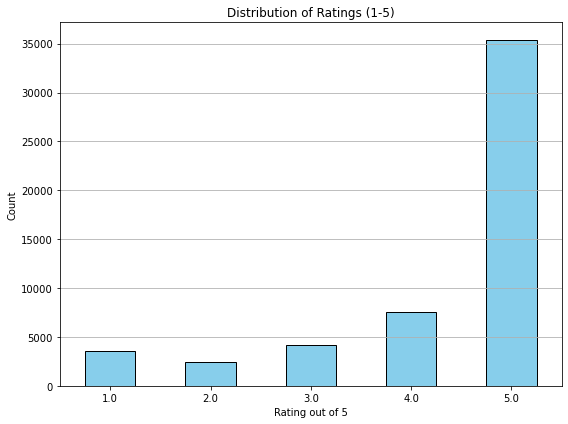

In [31]:
import matplotlib.pyplot as plt

# Plot a histogram for the distribution of ratings
plt.figure(figsize=(8, 6))
df_raw['Rating out of 5'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings (1-5)')
plt.xlabel('Rating out of 5')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [32]:
# Count the occurrences of each unique configuration
configurations_count = df_raw['Configuration Text'].value_counts()

#Demonstrates most of them are simply the Echo Dot
configurations_count


Echo Dot                                     53039
Echo Dot + Sony XB10 Speaker                     6
Echo Dot + Philips Hue Smart Lighting Kit        2
Echo Dot + Vaux Speaker                          1
Name: Configuration Text, dtype: int64

In [33]:
df = df_raw[['Uniq Id', 'Pageurl', 'Complete_Review', 'Rating out of 5']]
df

,Uniq Id,Pageurl,Complete_Review,Rating out of 5
0,d63583450415a20094950528ffb4d955,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars. Love the Echo Dot.,5.0
1,dc8e5ca6b44bea1006c8bb85cdca3816,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars. Working just fine.,5.0
2,f3f823996e2317dd65a6235011492b42,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars. I love my Echo Dot,5.0
3,3b6c928e62707a1530c591b897b864d6,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Three Stars. Not great speakers,3.0
4,275af85c81c1be55efd706f51a6c7cbe,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars. Great assistant !!,5.0
...,...,...,...,...
53043,fe90704851650044bbf2fba7cc652611,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Much better than I expected. Much better than ...,5.0
53044,49fb7433b27df684bef0a82a8e0fab55,https://www.amazon.com/All-New-Amazon-Echo-Dot...,"Bummer, didnt even make it through its voice t...",2.0
53045,dfa6e3366d5fffa541fe6cdf0d284f91,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Alexa - hard to stop at just one. Once you get...,5.0
53046,d74d55030164eff4f37139daf4627a2f,https://www.amazon.com/All-New-Amazon-Echo-Dot...,"Just beginning to find out what this can do, ....",3.0


In [34]:
#Save df to csv
df.to_csv("processed_amazon_echo_reviews.csv", index=False)